In [35]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
import tifffile
from skimage.morphology import label, remove_small_objects
from skimage.measure import regionprops_table
from skimage.color import label2rgb

In [2]:
a = sc.read_h5ad('../../multiplex_data/analysis/brca_dcis_v1/metaclustered/HT206B1_H1_06252022.h5ad')
a

AnnData object with n_obs × n_vars = 125181 × 14
    obs: 'area', 'perimeter', 'bbox_row_min', 'bbox_col_min', 'bbox_row_max', 'bbox_col_max', 'centroid_row', 'centroid_col', 'eccentricity', 'DAPI intensity max', 'CD31 intensity max', 'E-cadherin intensity max', 'CD4 intensity max', 'CD20 intensity max', 'Ki67 intensity max', 'CD68 intensity max', 'Pan-CK intensity max', 'CD8 intensity max', 'Histone H3 Pho intensity max', 'CD163 intensity max', 'Podoplanin intensity max', 'CD3e intensity max', 'CD36 intensity max', 'ER intensity max', 'GLUT1 intensity max', 'SMA intensity max', 'CK19 intensity max', 'MGP intensity max', 'Vimentin intensity max', 'PR intensity max', 'Foxp3 intensity max', 'CK17 intensity max', 'cKIT intensity max', 'HLA-DR intensity max', 'CK14 intensity max', 'CD11c intensity max', 'FGFR3 intensity max', 'GATA3 intensity max', 'DAPI intensity min', 'CD31 intensity min', 'E-cadherin intensity min', 'CD4 intensity min', 'CD20 intensity min', 'Ki67 intensity min', 'CD68 

In [3]:
a.obs

area   perimeter  bbox_row_min  bbox_col_min  \
HT206B1_H1_06252022_1        380   74.041631             0          4821   
HT206B1_H1_06252022_2        310   70.627417             0          4845   
HT206B1_H1_06252022_3        278   80.870058             0          4867   
HT206B1_H1_06252022_4        833  111.941125             0          5634   
HT206B1_H1_06252022_5        592   92.769553             0          5721   
...                          ...         ...           ...           ...   
HT206B1_H1_06252022_136402    48   32.349242         20149         10223   
HT206B1_H1_06252022_136403   222   73.627417         20150         10913   
HT206B1_H1_06252022_136404   108   59.798990         20152         10212   
HT206B1_H1_06252022_136405    56   33.556349         20154         10458   
HT206B1_H1_06252022_136406    39   27.556349         20154         10260   

                            bbox_row_max  bbox_col_max  centroid_row  \
HT206B1_H1_06252022_1                 19          4846      7.505263   
HT206B1_H1_06252022_2                 16          4868      6.541935   
HT206B1_H1_06252022_3                 14          4897      4.733813   
HT206B1_H1_06252022_4                 25          5674     10.346939   
HT206B1_H1_06252022_5                 24          5753      9.847973   
...                                  ...           ...           ...   
HT206B1_H1_06252022_136402         20157         10236  20152.750000   
HT206B1_H1_06252022_136403         20160         10942  20155.333333   
HT206B1_H1_06252022_136404         20160         10236  20156.500000   
HT206B1_H1_06252022_136405         20160         10473  20157.357143   
HT206B1_H1_06252022_136406         20160         10272  20157.102564   

                            centroid_col  eccentricity  DAPI intensity max  \
HT206B1_H1_06252022_1        4832.971053      0.683004             18790.0   
HT206B1_H1_06252022_2        4856.164516      0.722101             61606.0   
HT206B1_H1_06252022_3        4879.276978      0.931353             24283.0   
HT206B1_H1_06252022_4        5653.015606      0.774127             35152.0   
HT206B1_H1_06252022_5        5735.261824      0.674520             51562.0   
...                                  ...           ...                 ...   
HT206B1_H1_06252022_136402  10230.020833      0.877933              6102.0   
HT206B1_H1_06252022_136403  10927.900901      0.945689             18912.0   
HT206B1_H1_06252022_136404  10223.629630      0.952507             15680.0   
HT206B1_H1_06252022_136405  10465.946429      0.931476             14481.0   
HT206B1_H1_06252022_136406  10265.794872      0.894411             12111.0   

                            ...   topic_1   topic_2   topic_3   topic_4  \
HT206B1_H1_06252022_1       ...  0.000000  0.618568  0.019604  0.000000   
HT206B1_H1_06252022_2       ...  0.000000  0.743646  0.023065  0.000000   
HT206B1_H1_06252022_3       ...  0.000000  0.821627  0.017061  0.000000   
HT206B1_H1_06252022_4       ...  0.032994  0.029690  0.078039  0.031300   
HT206B1_H1_06252022_5       ...  0.000000  0.000000  0.019633  0.556573   
...                         ...       ...       ...       ...       ...   
HT206B1_H1_06252022_136402  ...  0.000000  0.000000  0.000000  0.000000   
HT206B1_H1_06252022_136403  ...  0.000000  0.000000  0.010322  0.000000   
HT206B1_H1_06252022_136404  ...  0.000000  0.000000  0.000000  0.000000   
HT206B1_H1_06252022_136405  ...  0.000000  0.000000  0.011221  0.000000   
HT206B1_H1_06252022_136406  ...  0.000000  0.000000  0.000000  0.000000   

                             topic_5   topic_6   topic_7   topic_8   topic_9  \
HT206B1_H1_06252022_1       0.010007  0.000000  0.000000  0.000000  0.303525   
HT206B1_H1_06252022_2       0.011769  0.000000  0.000000  0.010209  0.164716   
HT206B1_H1_06252022_3       0.000000  0.000000  0.000000  0.000000  0.110602   
HT206B1_H1_06252022_4       0.039833  0.031215  0.032178  0.034552  0.660189   
HT206B1_H1_0

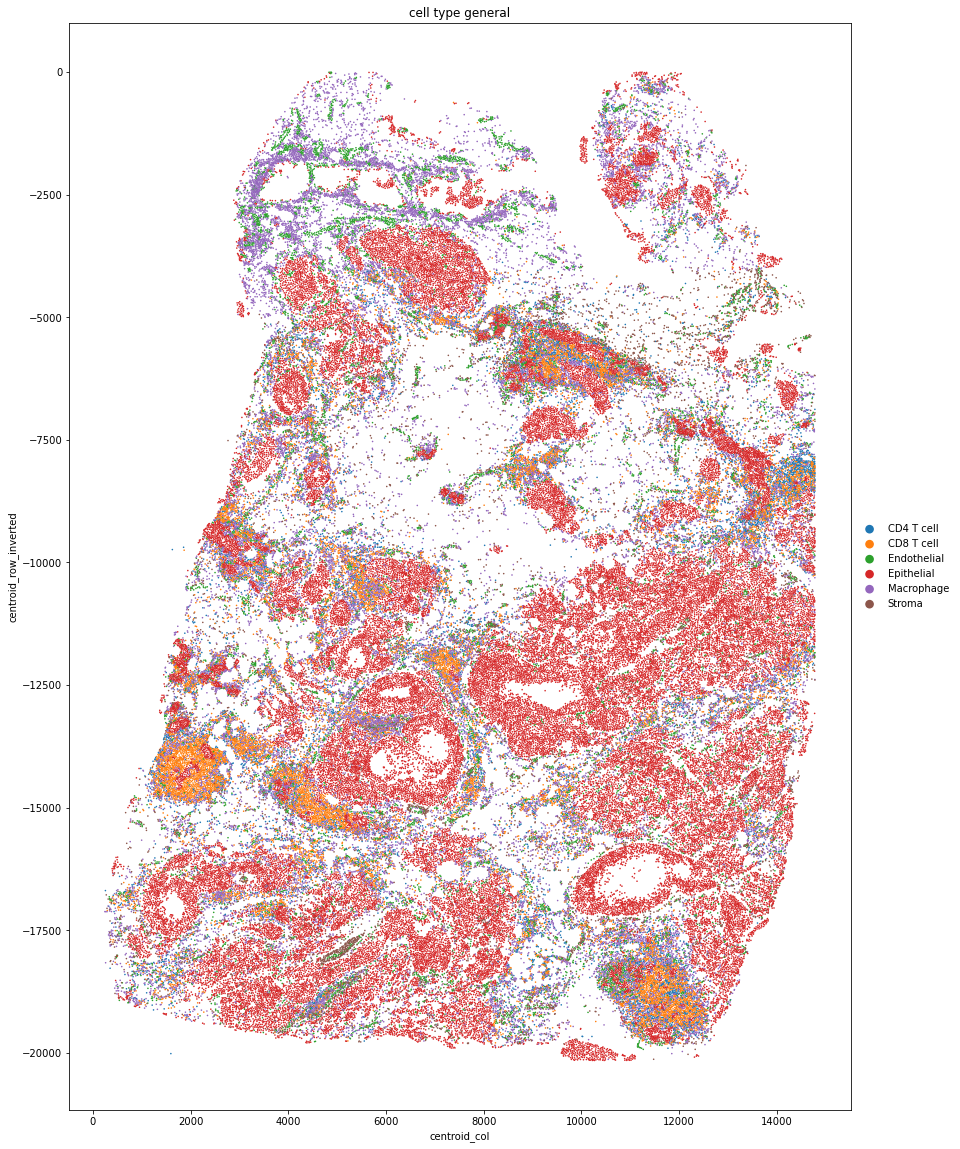

In [5]:
fig, ax = plt.subplots(
    figsize=(int(max(a.obs['centroid_col']) / 1000), int(max(a.obs['centroid_row']) / 1000)))
sc.pl.scatter(a, x='centroid_col', y='centroid_row_inverted', color='cell_type_general', ax=ax, size=10)

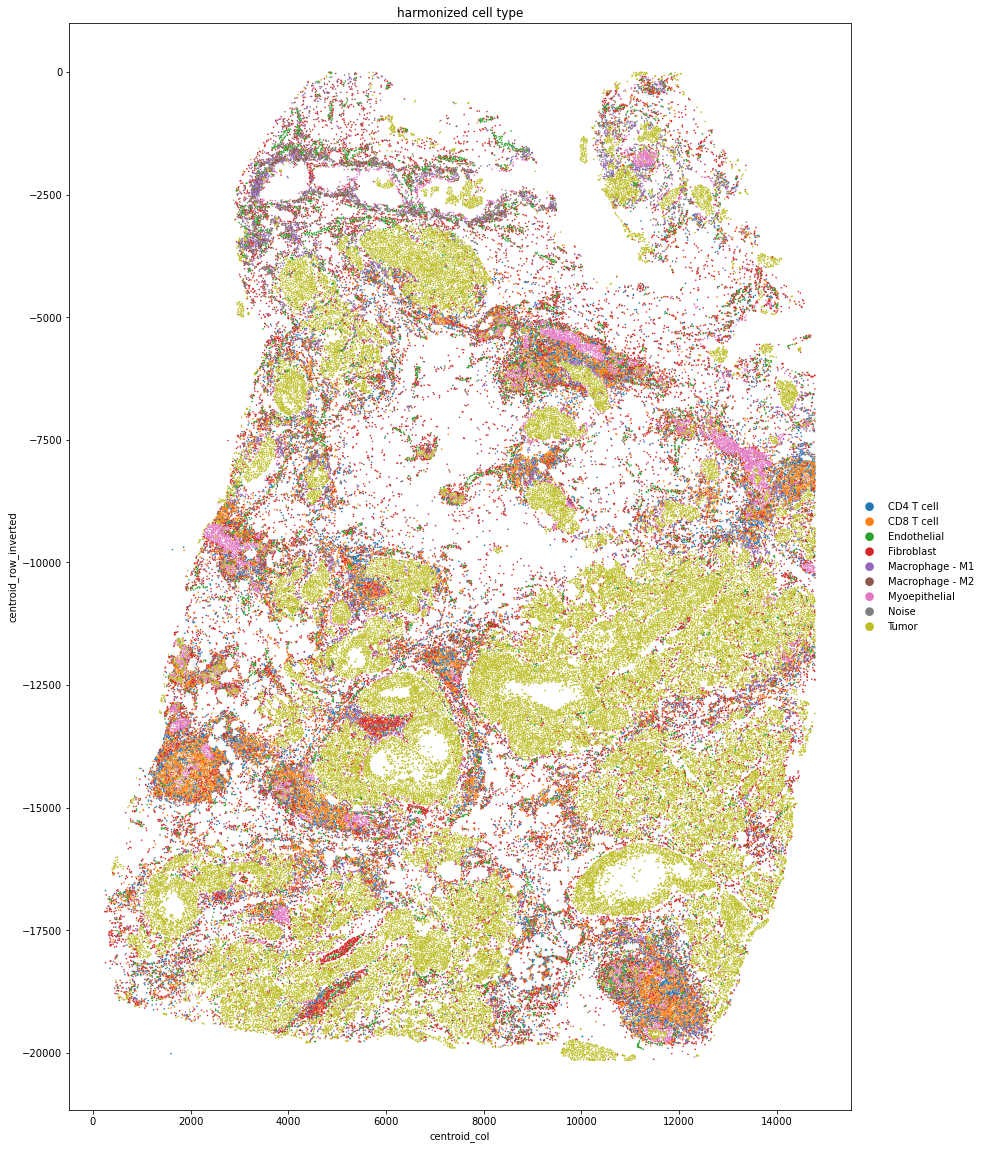

In [6]:
fig, ax = plt.subplots(
    figsize=(int(max(a.obs['centroid_col']) / 1000), int(max(a.obs['centroid_row']) / 1000)))
sc.pl.scatter(a, x='centroid_col', y='centroid_row_inverted', color='harmonized_cell_type', ax=ax, size=10)

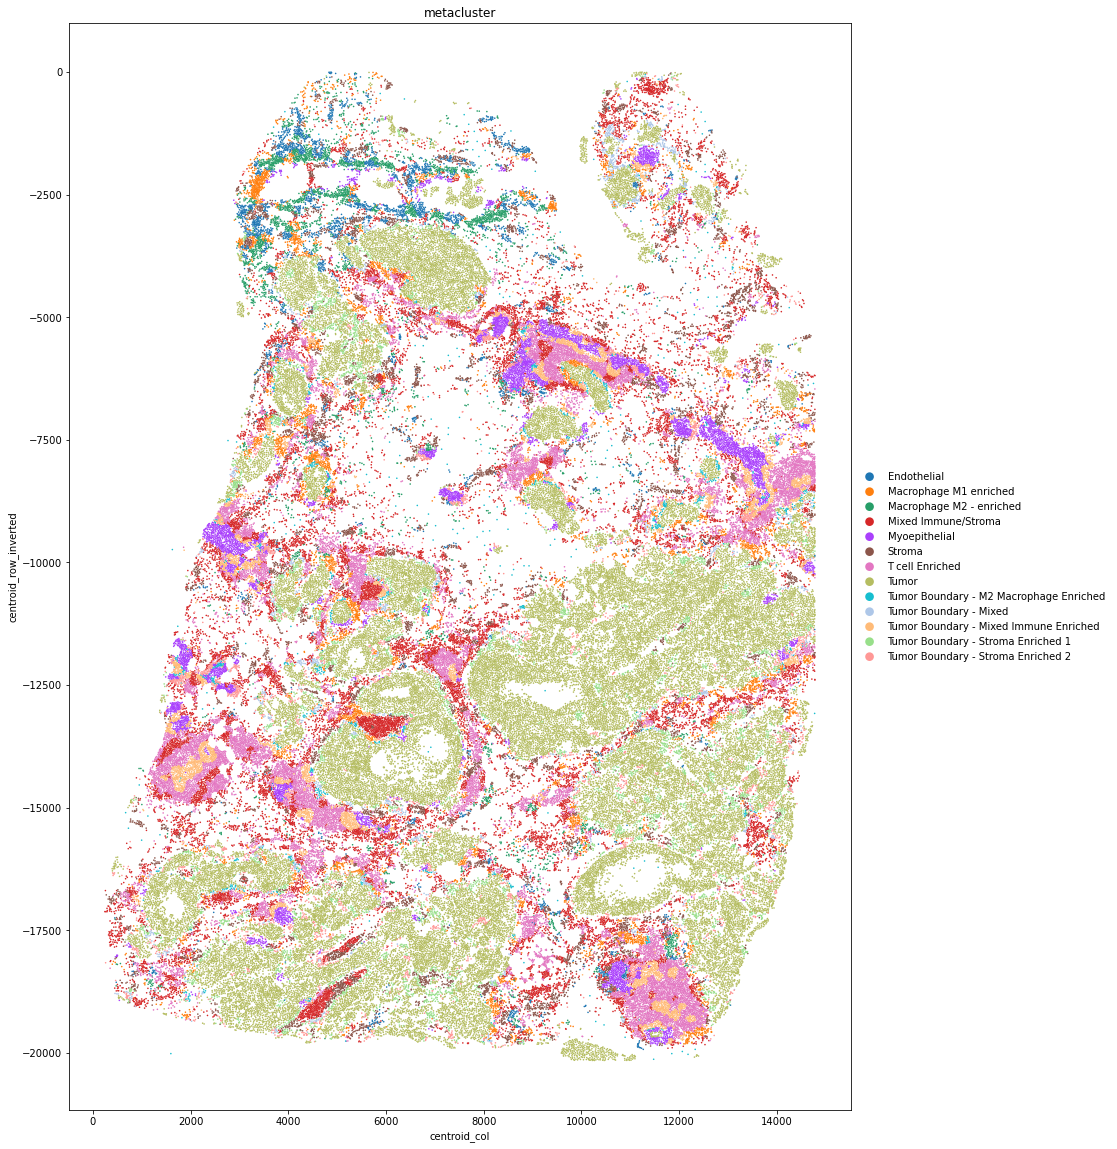

In [7]:
fig, ax = plt.subplots(
    figsize=(int(max(a.obs['centroid_col']) / 1000), int(max(a.obs['centroid_row']) / 1000)))
sc.pl.scatter(a, x='centroid_col', y='centroid_row_inverted', color='metacluster', ax=ax, size=10)

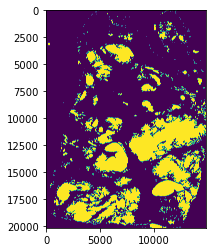

In [8]:
tumor_regions = tifffile.imread(
    '../../multiplex_data/codex/htan/brca/HT206B1_H1_06252022/level_3/annotations/tumor_mask_10_alpha.tif')
plt.imshow(tumor_regions)

In [9]:
tumor_regions.max()

True

In [11]:
labeled = label(tumor_regions)
np.unique(labeled)

array([   0,    1,    2, ..., 1436, 1437, 1438], dtype=int32)

In [16]:
regions = regionprops_table(labeled, properties=(
    'label', 'bbox', 'area', 'perimeter', 'centroid', 'eccentricity', 'extent'))
region_df = pd.DataFrame(regions)
region_df = region_df.set_index('label')

In [17]:
region_df

bbox-0  bbox-1  bbox-2  bbox-3   area   perimeter    centroid-0  \
label                                                                    
1           0    5626      23    5700   1045  168.118795      8.348325   
2           0    5725      15    5767    470   97.112698      5.704255   
3           0   11002     113   11359  25228  989.890440     43.566751   
4           3    4827      37    4861    914  110.325902     19.233042   
5           3   11807      36   11845    966  115.740115     18.723602   
...       ...     ...     ...     ...    ...         ...           ...   
1434    20060    8911   20084    8925    249   61.455844  20070.176707   
1435    20070   12038   20137   12155   4555  327.220346  20100.255763   
1436    20093   12192   20114   12213    356   67.112698  20102.693820   
1437    20115    9186   20160    9219   1122  136.769553  20139.199643   
1438    20128   11771   20160   11803    814  103.497475  20143.832924   

         centroid-1  eccentricity    extent  
label                                        
1       5656.371292      0.936888  0.613984  
2       5746.134043      0.922973  0.746032  
3      11175.898763      0.967858  0.625369  
4       4843.698031      0.417210  0.790657  
5      11825.698758      0.596933  0.770335  
...             ...           ...       ...  
1434    8917.722892      0.824367  0.741071  
1435   12107.210538      0.866571  0.581069  
1436   12202.224719      0.377806  0.807256  
1437    9203.669340      0.817638  0.755556  
1438   11786.638821      0.218436  0.794922  

[1438 rows x 10 columns]

/diskmnt/Projects/Users/estorrs/miniconda3/envs/squidpy/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area', ylabel='Density'>

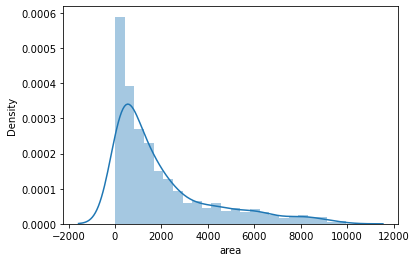

In [23]:
sns.distplot(region_df[region_df['area']<10000]['area'])


In [36]:
tumor_regions = remove_small_objects(tumor_regions, min_size=4000)
labeled = label(tumor_regions)
regions = regionprops_table(labeled, properties=(
    'label', 'bbox', 'area', 'perimeter', 'centroid', 'eccentricity', 'extent'))
region_df = pd.DataFrame(regions)
region_df = region_df.set_index('label')

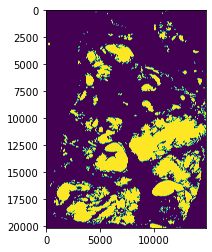

In [37]:
plt.imshow(tumor_regions)

In [38]:
region_df

bbox-0  bbox-1  bbox-2  bbox-3   area    perimeter    centroid-0  \
label                                                                     
1           0   11002     113   11359  25228   989.890440     43.566751   
2         104    4563     199    4686   6490   362.676190    156.069646   
3         175   10684     359   10816  14175   602.742207    271.342011   
4         186    5665     390    5749   6050   525.185858    283.229256   
5         879    5973    1260    6226  40619  1372.378859   1059.919914   
...       ...     ...     ...     ...    ...          ...           ...   
438     19753    8291   19914    8446  10209   542.215295  19840.890293   
439     19780    9136   19873    9229   5131   304.735065  19826.850516   
440     20011   10816   20160   11137  34637   945.310750  20095.151226   
441     20037   12277   20122   12461   6292   474.132034  20074.619835   
442     20070   12038   20137   12155   4555   327.220346  20100.255763   

         centroid-1  eccentricity    extent  
label                                        
1      11175.898763      0.967858  0.625369  
2       4624.624807      0.585988  0.555413  
3      10743.416790      0.735043  0.583622  
4       5700.565124      0.984132  0.353058  
5       6110.726507      0.930459  0.421390  
...             ...           ...       ...  
438     8376.455872      0.938165  0.409096  
439     9181.370298      0.787401  0.593248  
440    10987.181136      0.903752  0.724184  
441    12367.515734      0.947791  0.402302  
442    12107.210538      0.866571  0.581069  

[442 rows x 10 columns]

In [39]:
a.obs['tumor_region_id'] = [labeled[int(r), int(c)] for r, c in zip(a.obs['centroid_row'], a.obs['centroid_col'])]

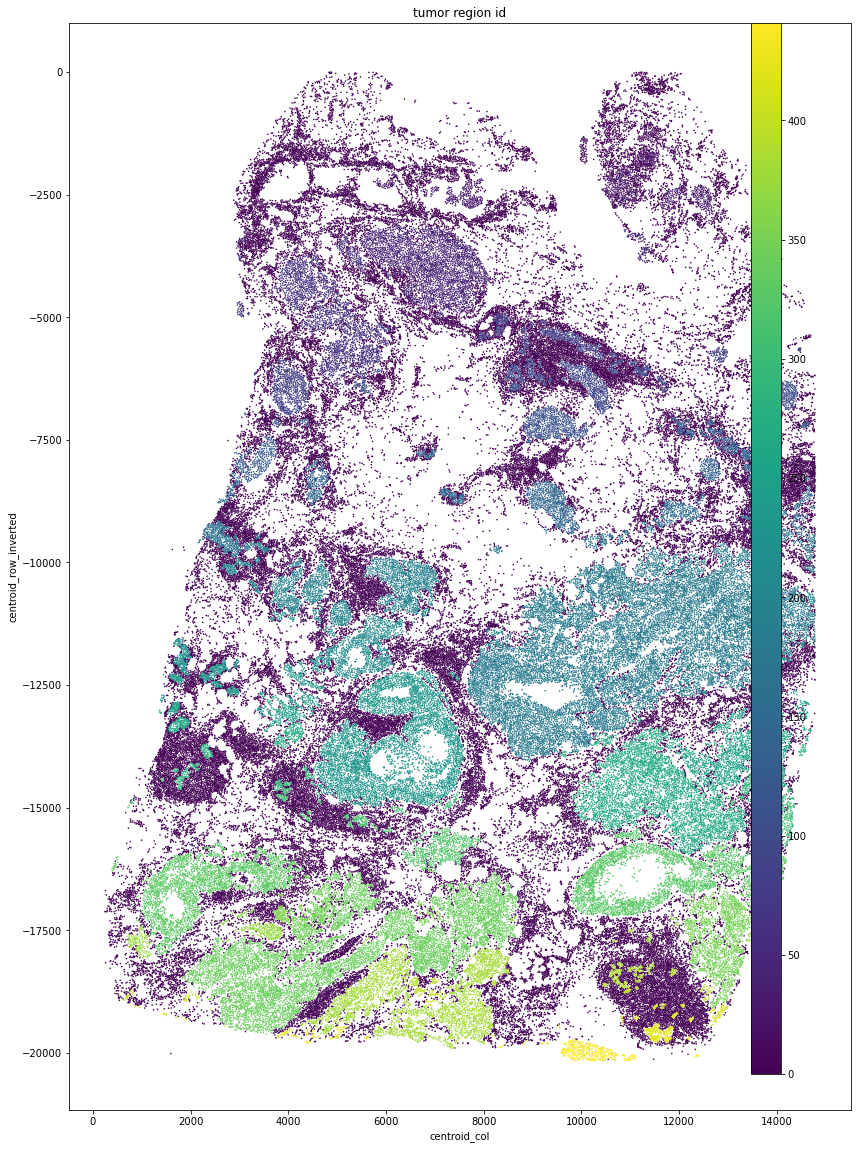

In [40]:
fig, ax = plt.subplots(
    figsize=(int(max(a.obs['centroid_col']) / 1000), int(max(a.obs['centroid_row']) / 1000)))
sc.pl.scatter(a, x='centroid_col', y='centroid_row_inverted', color='tumor_region_id', ax=ax, size=10)

In [41]:
from skimage.segmentation import expand_labels

In [42]:
# roughly 2 pixels per micron, numbers from angelo paper
epithelial = expand_labels(labeled, distance=40)

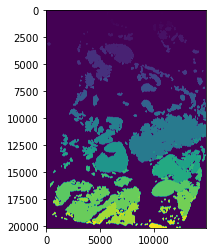

In [43]:
plt.imshow(epithelial)

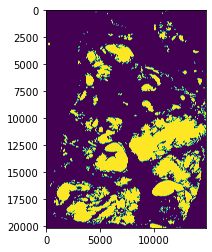

In [52]:
mask = labeled>0
plt.imshow(mask)

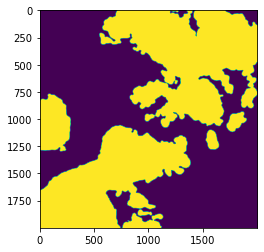

In [55]:
plt.imshow(mask[10000:12000, 5000:7000])

In [62]:
from skimage.morphology import erosion
eroded = mask.copy()
for i in range(10):
    eroded = erosion(eroded)


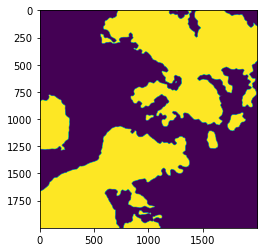

In [63]:
plt.imshow(eroded[10000:12000, 5000:7000])

In [65]:
ductal = np.zeros_like(labeled)
ductal[eroded] = labeled[eroded]

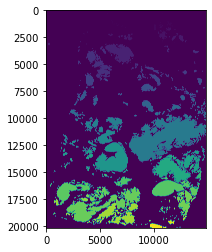

In [91]:
plt.imshow(labeled)

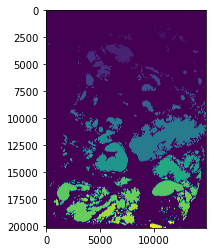

In [66]:
plt.imshow(ductal)

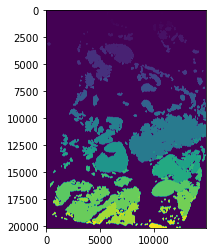

In [71]:
plt.imshow(epithelial)

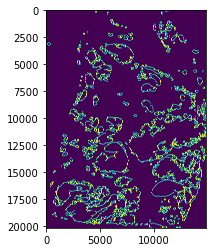

In [69]:
epithelial_mask = epithelial>0
ductal_mask = ductal>0
myo_mask = epithelial_mask ^ ductal_mask
plt.imshow(myo_mask)

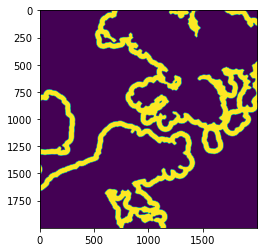

In [70]:
plt.imshow(myo_mask[10000:12000, 5000:7000])

In [72]:
myo = np.zeros_like(epithelial)
myo[myo_mask] = epithelial[myo_mask]

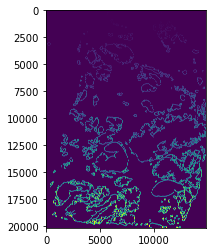

In [73]:
plt.imshow(myo)

In [92]:
outer = expand_labels(labeled, distance=100) # 50 microns
boundary = np.zeros_like(outer)

outer_mask = outer>0
ductal_mask = ductal>0
boundary_mask = outer_mask ^ ductal_mask

boundary[boundary_mask] = outer[boundary_mask]

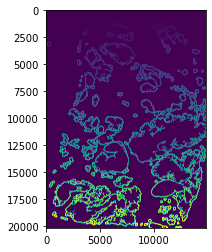

In [93]:
plt.imshow(boundary)

In [94]:
labeled_dict = {
    'ductal': ductal,
    'myoepithelial': myo,
    'epithelial': epithelial,
    'boundary': boundary,
}

mask_dict = {
    'ductal': ductal>0,
    'myoepithelial': myo>0,
    'epithelial': epithelial>0,
    'boundary': boundary>0
}

In [95]:
props_dict = {}
for name, img in labeled_dict.items():
    regions = regionprops_table(img, properties=(
        'label', 'bbox', 'area', 'perimeter', 'centroid', 'eccentricity', 'extent'))
    df = pd.DataFrame(regions)
    df = df.set_index('label')
    props_dict[name] = df

In [96]:
region_to_bbox = {l:(r1, c1, r2, c2)
                  for l, r1, c1, r2, c2 in zip(
                      props_dict['boundary'].index,
                      props_dict['boundary']['bbox-0'],
                      props_dict['boundary']['bbox-1'], 
                      props_dict['boundary']['bbox-2'],
                      props_dict['boundary']['bbox-3'])}

In [475]:
from mip.utils import extract_ome_tiff

In [476]:
channel_to_img = extract_ome_tiff('../../multiplex_data/codex/htan/brca/HT206B1_H1_06252022/level_2/HT206B1_H1_06252022.ome.tiff')
channel_to_img.keys()

dict_keys(['DAPI', 'CD31', 'E-cadherin', 'CD4', 'CD20', 'Ki67', 'CD68', 'Pan-CK', 'CD8', 'Histone H3 Pho', 'CD163', 'Podoplanin', 'CD3e', 'CD36', 'ER', 'GLUT1', 'SMA', 'CK19', 'MGP', 'Vimentin', 'PR', 'Foxp3', 'CK17', 'cKIT', 'HLA-DR', 'CK14', 'CD11c', 'FGFR3', 'GATA3'])

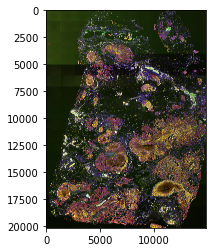

In [76]:
pseudo = tifffile.imread('../../multiplex_data/codex/htan/brca/HT206B1_H1_06252022/level_2/pseudo/dapi_panck_sma_pdpn_mgp.tiff')
plt.imshow(pseudo)

In [97]:
for name, img in labeled_dict.items():
    a.obs[f'{name}_region_id'] = [img[int(r), int(c)] for r, c in zip(a.obs['centroid_row'], a.obs['centroid_col'])]

#### metrics

###### polsby popper

In [98]:
import math
def compute_polsby_popper(area, perimeter):
    try:
        return 4 * math.pi * area / perimeter ** 2
    except ZeroDivisionError:
        return math.nan

In [99]:
for name, df in props_dict.items():
    df['compactness'] = [compute_polsby_popper(area, per)
                         for area, per in zip(df['area'], df['perimeter'])]

###### cell fractions

In [102]:
from collections import Counter
cell_types = sorted(set(a.obs['harmonized_cell_type']))
for name, df in props_dict.items():
    data = []
    for region in df.index:
        ls = a[a.obs[f'{name}_region_id']==region].obs['harmonized_cell_type']
        counts = Counter(ls)
        data.append([counts[ct] / (len(ls) + 1) for ct in cell_types])
    frac_df = pd.DataFrame(data=data, columns=[f'{ct}_cell_fraction' for ct in cell_types],
                           index=df.index.to_list())
    props_dict[name] = pd.concat((df, frac_df), axis=1)
    

In [103]:
next(iter(props_dict.values()))

bbox-0  bbox-1  bbox-2  bbox-3   area    perimeter    centroid-0  \
1         0   11012     103   11349  19482   909.949314     37.456678   
2       114    4573     189    4674   3651   294.663997    155.824432   
3       185   10694     349   10806   9244   535.043723    274.554197   
4       196    5675     380    5739   1887   421.960461    273.063063   
5       889    5997    1250    6216  29339  1253.100685   1063.439211   
..      ...     ...     ...     ...    ...          ...           ...   
438   19763    8301   19904    8436   5763   479.788889  19840.532362   
439   19790    9146   19863    9219   2745   241.137085  19826.616758   
440   20021   10826   20160   11127  28747   891.168614  20100.706752   
441   20047   12287   20112   12443   2534   342.871104  20070.656275   
442   20080   12055   20127   12145   2012   220.302561  20102.890656   

       centroid-1  eccentricity    extent  compactness  \
1    11182.203367      0.968860  0.561263     0.295671   
2     4626.284853      0.560117  0.481980     0.528406   
3    10744.952942      0.759303  0.503267     0.405781   
4     5703.188129      0.993694  0.160241     0.133180   
5     6113.362862      0.944522  0.371103     0.234792   
..            ...           ...       ...          ...   
438   8377.462780      0.961015  0.302758     0.314600   
439   9182.118033      0.840828  0.515106     0.593231   
440  10991.130448      0.903030  0.687086     0.454865   
441  12374.238753      0.964845  0.249901     0.270866   
442  12115.927932      0.811243  0.475650     0.520953   

     CD4 T cell_cell_fraction  CD8 T cell_cell_fraction  \
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
5                         0.0                       0.0   
..                        ...                       ...   
438                       0.2                       0.0   
439                       0.0                       0.0   
440                       0.0                       0.0   
441                       0.0                       0.0   
442                       0.0                       0.0   

     Endothelial_cell_fraction  Fibroblast_cell_fraction  \
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
5                          0.0                       0.0   
..                         ...                       ...   
438                        0.0                       0.0   
439                        0.0                       0.0   
440                        0.0                       0.0   
441                        0.0                       0.0   
442                        0.0                       0.0   

     Macrophage - M1_cell_fraction  Macrophage - M2_cell_fraction  \
1                              0.0                            0.0   
2                              0.0                            0.0   
3                              0.0                            0.0   
4                              0.0                            0.0   
5                              0.0                            0.0   
..                             ...                            ...   
438                            0.0                            0.0   
439                            0.0                            0.0   
440                            0.0                            0.0   
441                            0.0                            0.0   
442                            0.0                            0.0   

     Myoepithelial_cell_fraction  Noise_cell_fraction  Tumor_cell_fraction  
1                         0.0000                  0.0             0.952381  
2                 

In [104]:
cell_types = sorted(set(a.obs['metacluster']))
for name, df in props_dict.items():
    data = []
    for region in df.index:
        ls = a[a.obs[f'{name}_region_id']==region].obs['metacluster']
        counts = Counter(ls)
        data.append([counts[ct] / (len(ls) + 1) for ct in cell_types])
    frac_df = pd.DataFrame(data=data, columns=[f'{ct}_metacluster_fraction' for ct in cell_types],
                           index=df.index.to_list())
    props_dict[name] = pd.concat((df, frac_df), axis=1)
    

In [105]:
next(iter(props_dict.values()))

bbox-0  bbox-1  bbox-2  bbox-3   area    perimeter    centroid-0  \
1         0   11012     103   11349  19482   909.949314     37.456678   
2       114    4573     189    4674   3651   294.663997    155.824432   
3       185   10694     349   10806   9244   535.043723    274.554197   
4       196    5675     380    5739   1887   421.960461    273.063063   
5       889    5997    1250    6216  29339  1253.100685   1063.439211   
..      ...     ...     ...     ...    ...          ...           ...   
438   19763    8301   19904    8436   5763   479.788889  19840.532362   
439   19790    9146   19863    9219   2745   241.137085  19826.616758   
440   20021   10826   20160   11127  28747   891.168614  20100.706752   
441   20047   12287   20112   12443   2534   342.871104  20070.656275   
442   20080   12055   20127   12145   2012   220.302561  20102.890656   

       centroid-1  eccentricity    extent  ...  \
1    11182.203367      0.968860  0.561263  ...   
2     4626.284853      0.560117  0.481980  ...   
3    10744.952942      0.759303  0.503267  ...   
4     5703.188129      0.993694  0.160241  ...   
5     6113.362862      0.944522  0.371103  ...   
..            ...           ...       ...  ...   
438   8377.462780      0.961015  0.302758  ...   
439   9182.118033      0.840828  0.515106  ...   
440  10991.130448      0.903030  0.687086  ...   
441  12374.238753      0.964845  0.249901  ...   
442  12115.927932      0.811243  0.475650  ...   

     Mixed Immune/Stroma_metacluster_fraction  \
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
5                                         0.0   
..                                        ...   
438                                       0.0   
439                                       0.0   
440                                       0.0   
441                                       0.0   
442                                       0.0   

     Myoepithelial_metacluster_fraction  Stroma_metacluster_fraction  \
1                                   0.0                          0.0   
2                                   0.0                          0.0   
3                                   0.0                          0.0   
4                                   0.0                          0.0   
5                                   0.0                          0.0   
..                                  ...                          ...   
438                                 0.0                          0.0   
439                                 0.0                          0.0   
440                                 0.0                          0.0   
441                                 0.0                          0.0   
442                                 0.0                          0.0   

     T cell Enriched_metacluster_fraction  Tumor_metacluster_fraction  \
1                                     0.0                    0.904762   
2                                     0.0                    0.000000   
3                                     0.0                    0.700000   
4                                     0.0                    0.333333   
5                                     0.0                    0.968750   
..                                    ...                         ...   
438                                   0.0                    0.200000   
439                                   0.0                    0.750000   
440                                   0.0                    0.964286   
441                                   0.0                    0.800000   
442                                   0.0                    0.000000   

     Tumor Boundary - M2 Macrophage Enriched_metacluster_fraction  \
1                                                  0.0              
2                                                  0.0    

###### arc grid fractions

In [240]:
import rasterio
from rasterio import features
import shapely
from shapely.geometry import Point, Polygon

def mask_to_polygon(mask):
    for shape, value in features.shapes(mask.astype(np.int16), mask=(mask >0), transform=rasterio.Affine(1.0, 0, 0, 0, 1.0, 0)):
        return shapely.geometry.shape(shape)
    
#     all_polygons = []
#     for shape, value in features.shapes(mask.astype(np.int16), mask=(mask >0), transform=rasterio.Affine(1.0, 0, 0, 0, 1.0, 0)):
#         all_polygons.append(shapely.geometry.shape(shape))
#     print(len(all_polygons))
#     all_polygons = shapely.geometry.MultiPolygon(all_polygons)
#     if not all_polygons.is_valid:
#         all_polygons = all_polygons.buffer(0)
#         # Sometimes buffer() converts a simple Multipolygon to just a Polygon,
#         # need to keep it a Multi throughout
#         if all_polygons.type == 'Polygon':
#             all_polygons = shapely.geometry.MultiPolygon([all_polygons])
#     return all_polygons

polygons = mask_to_polygons_layer(epi)

In [106]:
mask_dict.keys()

dict_keys(['ductal', 'myoepithelial', 'epithelial', 'boundary'])

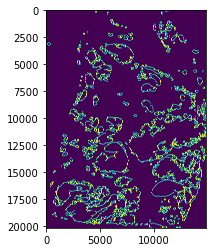

In [107]:
plt.imshow(mask_dict['myoepithelial'])

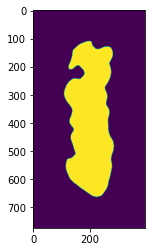

In [464]:
l = 10
r1, c1, r2, c2 = region_to_bbox[l]
mask = mask_dict['ductal'][r1:r2, c1:c2]
plt.imshow(mask)

In [494]:
import shapely
from shapely import Polygon, Point
import rasterio
from rasterio import features
RING = None
def generate_labeled_expansion_grid(mask, parallel_step=10, perp_steps=10, expansion=50):
    ring = mask_to_polygon(mask).exterior
    RING = ring
    perp_step = expansion // perp_steps
    rings = []
    for i in range(perp_steps):
        new = ring.parallel_offset(perp_step * i, side='right')
        rings.append(new)
    
    polys = []
    for i in range(len(rings) - 1):
        inner_ring = rings[i]
        outer_ring = rings[i + 1]
        parallel_steps = int(inner_ring.length // parallel_step)
        for j in range(parallel_steps):
            inner_pt1 = inner_ring.interpolate(j * parallel_step)
            inner_pt2 = inner_ring.interpolate((j + 1) * parallel_step)

            inner_pts = [inner_ring.interpolate(x)
                         for x in range(j * parallel_step, (j + 1) * parallel_step, 1)]

            if shapely.shortest_line(inner_pt1, outer_ring) is not None:
                outer_pt1 = Point(shapely.shortest_line(inner_pt1, outer_ring).coords[1])
                outer_pt2 = Point(shapely.shortest_line(inner_pt2, outer_ring).coords[1])
                d1, d2 = outer_ring.project(outer_pt1), outer_ring.project(outer_pt2)

                outer_pts = [outer_ring.interpolate(x)
                             for x in range(int(d2), int(d1) - 1, -1)]

                poly_pts = inner_pts
                poly_pts += outer_pts
                poly_pts = [pt.coords[0] for pt in poly_pts]
                poly = Polygon(poly_pts)
                polys.append(poly)
    
    labeled_grid = np.zeros(mask.shape, dtype=np.int32)
    for i, poly in enumerate(polys):
        mask = rasterio.features.rasterize([poly], out_shape=mask.shape)
        labeled_grid[mask!=0] = i + 1
    return labeled_grid, polys

def generate_myo_props(region_id, mask_dict, channel_to_img, channels=('SMA',)):
    r1, c1, r2, c2 = region_to_bbox[region_id]
    mask = mask_dict['ductal'][r1:r2, c1:c2]
    labeled_grid, polys = generate_labeled_expansion_grid(mask)
    
    channel_to_props = {}
    for channel in channels:
        img = channel_to_img[channel][r1:r2, c1:c2]
        df = pd.DataFrame(regionprops_table(labeled_grid, intensity_image=img,
            properties=('label', 'area', 'intensity_mean')))
        channel_to_props[channel] = {
            df['area'].sum(),
            df['intensity_mean'].mean()
        }
    return labeled_grid, polys, channel_to_props
    
    


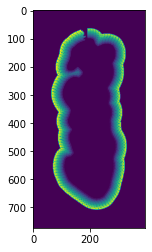

In [495]:
labeled_grid, polys, channel_to_props = generate_myo_props(10, mask_dict, channel_to_img)
plt.imshow(labeled_grid)

In [496]:
type(RING)

NoneType

In [486]:
channel_to_props['SMA']

label  area  intensity_mean
0         1    48      170.187500
1         2    60      201.366667
2         3    47      145.553191
3         4    41      184.585366
4         5    39      181.717949
...     ...   ...             ...
1208   1211    50      169.700000
1209   1212    48      176.395833
1210   1213    51      255.098039
1211   1214    47      154.063830
1212   1215    48      243.625000

[1213 rows x 3 columns]

In [473]:
labeled_grid = generate_labeled_expansion_grid(mask)

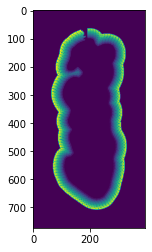

In [474]:
plt.imshow(labeled_grid)